## Final Project Submission

Please fill out:
* Student name: Ice Asortse
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 11/1/2019
* Instructor name: Rafael
* Blog post URL:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline
inline_rc = dict(mpl.rcParams)

plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4CD3-443B

 Directory of C:\Users\Ice Asortse\FlatironData\ProjectMod1\dsc-v2-mod1-final-project-online-ds-ft-100719

11/01/2019  09:44 AM    <DIR>          .
11/01/2019  09:44 AM    <DIR>          ..
10/21/2019  01:12 PM               146 .gitignore
10/28/2019  02:18 PM    <DIR>          .ipynb_checkpoints
10/21/2019  01:12 PM                93 .learn
10/21/2019  01:12 PM         1,425,341 awesome.gif
10/21/2019  01:12 PM             1,120 column_names.md
10/21/2019  01:12 PM             1,846 CONTRIBUTING.md
10/21/2019  01:12 PM         2,475,934 kc_house_data.csv
10/21/2019  01:12 PM             1,354 LICENSE.md
10/21/2019  01:12 PM            79,134 module1_project_rubric.pdf
10/30/2019  01:48 PM           742,738 OSEMIN_scaffolding.ipynb
10/21/2019  01:12 PM            13,290 README.md
11/01/2019  09:44 AM           701,038 student.ipynb
10/29/2019  11:30 AM         1,601,070 study_group_starter.ipynb
              12 File(s) 

In [3]:
# import and getting basic info about the data
df = pd.read_csv('kc_house_data.csv')
display(df.head())
#df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

In [5]:
#getting basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#My data contains 21597 entries. From the info, you can tell that we have both numerical and categorical data.
#The 3rd column  is what we want to predict (Price)

# Scrub

In [7]:
# getting the 5 number summary of the the dataset 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# 'id', and 'date' colunms are not needed, so i will drop them right off the back
#dropping columns id and date
data = df.drop(['id', 'date'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


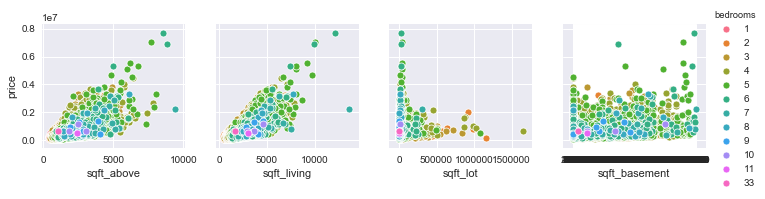

In [9]:
#Visualizing the data
sns.pairplot(data, x_vars=["sqft_above", "sqft_living", "sqft_lot", "sqft_basement"], y_vars=["price"], hue = "bedrooms")

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

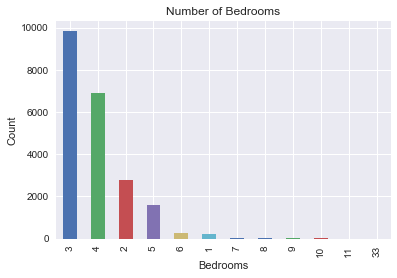

In [10]:
#checking to see which house is the most common(bedroom wise)
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

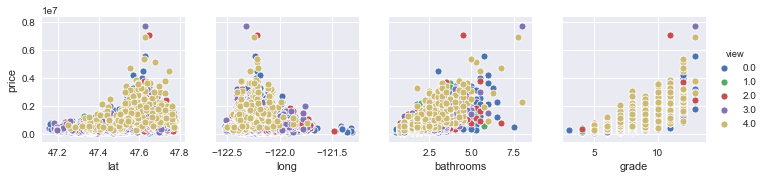

In [11]:
#Visualizing the data
sns.pairplot(data, 
             x_vars=["lat", "long", "bathrooms", "grade"], 
             y_vars=["price"],
             hue = "view")
             

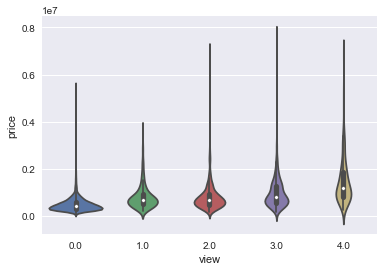

In [12]:
sns.violinplot(data=df, x = 'view', y = 'price')

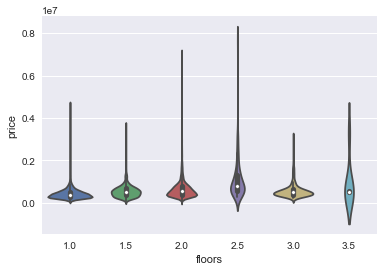

In [13]:
sns.violinplot(data=df, x = 'floors', y = 'price')

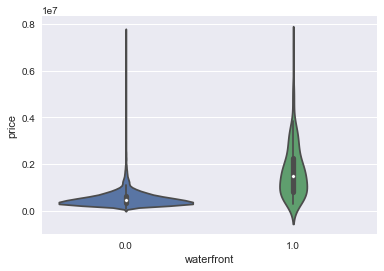

In [14]:
sns.violinplot(data=df, x = 'waterfront', y = 'price')

In [15]:
#checking the shape of the dataset
data.shape

(21597, 19)

In [16]:
#finding Null values
data.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [17]:
#Number of NaNs the in KC house dataset by column
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# find duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

4


In [19]:
# dropping duplicate values 
data.drop_duplicates(keep='first',inplace=True) 

In [20]:
#check for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [21]:
# checking for missing values with placeholders
for col in data.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 


bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
1800    0.005973
1820    0.005927
1480    0.005788
1720    0.005788
1540    0.005742
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
4800    0.005510
4500 

In [22]:
# sqft_basement has a ? for roughly 2% 

In [23]:
# replace ? with nan
data.replace(['?',], np.nan, inplace=True)

In [24]:
#checking to make sure ? is replaced with nan
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(10), '\n\n')

price 
 450000.0    0.007966
350000.0    0.007966
550000.0    0.007363
500000.0    0.007039
425000.0    0.006947
325000.0    0.006854
400000.0    0.006715
375000.0    0.006391
300000.0    0.006159
525000.0    0.006067
Name: price, dtype: float64 


bedrooms 
 3     0.454823
4     0.318714
2     0.127773
5     0.074144
6     0.012597
1     0.009077
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248923
1.00    0.178345
1.75    0.141157
2.25    0.094753
2.00    0.089335
1.50    0.066920
2.75    0.054879
3.00    0.034872
3.50    0.033854
3.25    0.027277
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006391
1400    0.006252
1440    0.006159
1660    0.005974
1010    0.005974
1800    0.005974
1820    0.005928
1480    0.005789
1720    0.005789
1540    0.005743
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016579
6000    0.013430
4000    0.011624
7200    0.010188
4800    0.005511
7500    0.005511
4500 

In [25]:
df = data.drop(['waterfront', 'view', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [26]:
# Dropping Rows That Contain Null Values and checking for null values
data = df.dropna()
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
data.shape

(21139, 16)

In [28]:
#checking the data
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0.0,1963,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0.0,2003,98038,47.3684,-122.031,2390,7570
10,662500.0,3,2.50,3560,9796,1.0,3,8,1860,1700.0,1965,98007,47.6007,-122.145,2210,8925


In [29]:
#checking for multicolinearity of features
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309177,0.525894,0.702326,0.087927,0.256452,0.035273,0.667846,0.605133,0.054508,-0.053142,0.306503,0.022061,0.586407,0.083180
bedrooms,0.309177,1.000000,0.513892,0.577970,0.032223,0.179255,0.025632,0.357068,0.479182,0.157212,-0.152643,-0.009540,0.131038,0.392422,0.030433
bathrooms,0.525894,0.513892,1.000000,0.755316,0.087899,0.504141,-0.127991,0.666530,0.686478,0.508435,-0.204273,0.024993,0.224478,0.570159,0.088849
sqft_living,0.702326,0.577970,0.755316,1.000000,0.172920,0.354933,-0.061352,0.763295,0.876675,0.319638,-0.198871,0.052981,0.240732,0.756366,0.184438
sqft_lot,0.087927,0.032223,0.087899,0.172920,1.000000,-0.007439,-0.009707,0.113468,0.183453,0.052851,-0.129375,-0.085461,0.230582,0.143407,0.720644
floors,0.256452,0.179255,0.504141,0.354933,-0.007439,1.000000,-0.264188,0.459105,0.524466,0.489508,-0.059011,0.048985,0.126134,0.280519,-0.011450
condition,0.035273,0.025632,-0.127991,-0.061352,-0.009707,-0.264188,1.000000,-0.148417,-0.159332,-0.362026,0.003406,-0.015599,-0.106334,-0.093554,-0.004901
grade,0.667846,0.357068,0.666530,0.763295,0.113468,0.459105,-0.148417,1.000000,0.756554,0.448010,-0.185145,0.113403,0.199323,0.713772,0.121995
sqft_above,0.605133,0.479182,0.686478,0.876675,0.183453,0.524466,-0.159332,0.756554,1.000000,0.425336,-0.260755,-0.000357,0.344484,0.730990,0.195623
yr_built,0.054508,0.157212,0.508435,0.319638,0.052851,0.489508,-0.362026,0.448010,0.425336,1.000000,-0.347360,-0.148739,0.409501,0.325632,0.071505


In [30]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


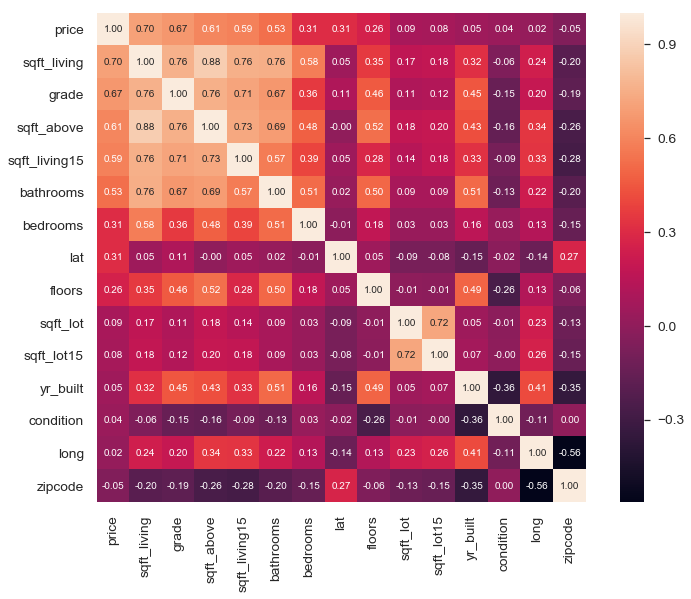

In [31]:
# Top 15 Heatmap
corrmat = data.corr()
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
data = data.drop(['sqft_living', 'lat', 'long', 'zipcode', 'sqft_basement'], axis=1)

In [33]:
data.head(12)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,8080,1.0,3,8,1680,1987,1800,7503
5,1230000.0,4,4.50,101930,1.0,3,11,3890,2001,4760,101930
7,291850.0,3,1.50,9711,1.0,3,7,1060,1963,1650,9711
8,229500.0,3,1.00,7470,1.0,3,7,1050,1960,1780,8113
9,323000.0,3,2.50,6560,2.0,3,7,1890,2003,2390,7570
10,662500.0,3,2.50,9796,1.0,3,8,1860,1965,2210,8925


# Explore

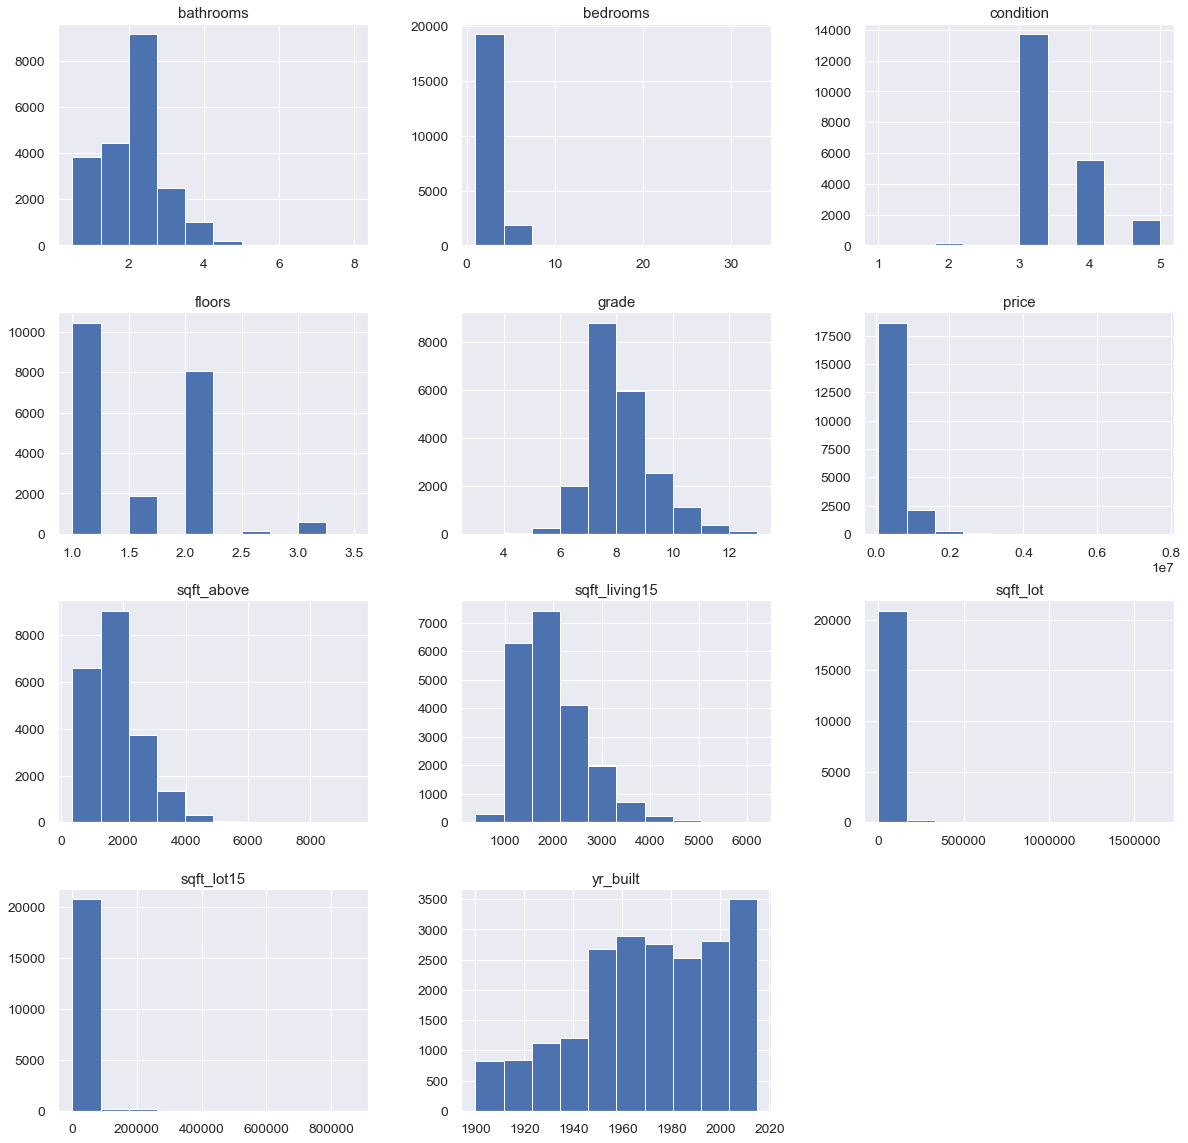

In [34]:
#checking for distribution
data.hist(figsize=(20,20));

In [35]:
# bin the year built
bins_yr_built = pd.cut(x =data['yr_built'], bins=[1889, 1930,1960,1990,2015] )

In [36]:
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_yr_built =  bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1930, 1960]
1    (1930, 1960]
2    (1930, 1960]
3    (1960, 1990]
4    (1960, 1990]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1889, 1930] < (1930, 1960] < (1960, 1990] < (1990, 2015]]

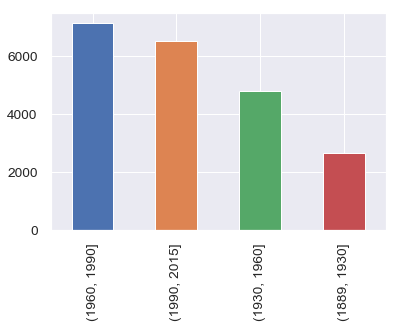

In [37]:
 #Inspect the result
bins_yr_built.value_counts().plot(kind='bar')

In [38]:
#inserting binned year built into dataset
data['yr_built'] = bins_yr_built
data['yr_built'] = data['yr_built'].cat.codes
data.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,3,7,1180,1,1340,5650
1,538000.0,3,2.25,7242,2.0,3,7,2170,1,1690,7639
2,180000.0,2,1.00,10000,1.0,3,6,770,1,2720,8062
3,604000.0,4,3.00,5000,1.0,5,7,1050,2,1360,5000
4,510000.0,3,2.00,8080,1.0,3,8,1680,2,1800,7503
5,1230000.0,4,4.50,101930,1.0,3,11,3890,3,4760,101930
7,291850.0,3,1.50,9711,1.0,3,7,1060,2,1650,9711
8,229500.0,3,1.00,7470,1.0,3,7,1050,1,1780,8113
9,323000.0,3,2.50,6560,2.0,3,7,1890,3,2390,7570
10,662500.0,3,2.50,9796,1.0,3,8,1860,2,2210,8925


In [39]:
# scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = data.columns

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round(3)
    

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000
mean,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.257,-2.565,-2.103,-0.354,-0.915,-3.705,-3.967,-1.713,-1.821,-2.316,-0.445
25%,-0.594,-0.403,-0.476,-0.244,-0.915,-0.630,-0.560,-0.711,-0.826,-0.725,-0.281
50%,-0.246,-0.403,0.174,-0.181,0.012,-0.630,-0.560,-0.277,0.170,-0.215,-0.188
75%,0.284,0.678,0.500,-0.107,0.940,0.907,0.291,0.508,1.165,0.544,-0.098
max,19.450,32.032,7.656,39.704,3.722,2.444,4.549,9.199,1.165,6.158,31.595


In [40]:
df = data.loc[np.abs(data[col]) < 3]
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,-0.865594,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968
1,-0.006851,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764
2,-0.979423,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196
3,0.172450,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890
4,-0.082918,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770


In [41]:
data_pred = df.iloc[:,1:11]
data_pred.head()

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968
1,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764
2,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196
3,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890
4,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770


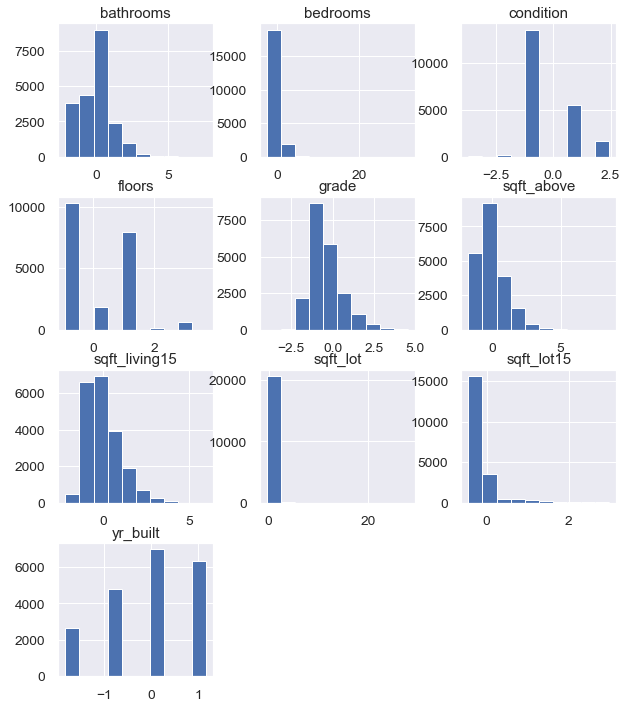

In [42]:
data_pred.hist(figsize = [10,12]);

In [45]:
data_pred = data_pred.drop('sqft_lot', axis=1)

# Model

In [46]:
price = df['price']
data_ols = pd.concat([price, data_pred], axis=1)
data_ols.head()

,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,-0.865594,-0.402926,-1.452091,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968
1,-0.006851,-0.402926,0.174295,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764
2,-0.979423,-1.484097,-1.452091,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196
3,0.172450,0.678244,1.150126,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890
4,-0.082918,-0.402926,-0.150983,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770


In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [49]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3255.
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:47:56   Log-Likelihood:                -20352.
No. Observations:               20787   AIC:                         4.072e+04
Df Residuals:                   20777   BIC:                         4.080e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0113      0.005     -2.413      0.016      -0.020      -0.002
bedrooms         -0.0639      0.005    -11.646      0.000      -0.075      -0.053
bathrooms         0.2322      0.007     31.827      0.000       0.218       0.247
floors           -0.0348      0.006     -5.779      0.000      -0.047      -0.023
condition         0.0524      0.005     10.802      0.000       0.043       0.062
grade             0.4651      0.008     59.621      0.000       0.450       0.480
sqft_above        0.2184      0.009     24.599      0.000       0.201       0.236
yr_built         -0.3514      0.006    -61.655      0.000      -0.363      -0.340
sqft_living15     0.1347      0.007     18.220      0.000       0.120       0.149
sqft_lot15       -0.1284      0.013     -9.827      0.000      -0.154      -0.103
==============================================================================
Omnibus:                    18438.570   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1823743.734
Skew:                           3.841   Prob(JB):                         0.00
Kurtosis:                      48.239   Cond. No.                         6.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear regression using Scikit learn

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
y = data_ols['price']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# coefficients
linreg.coef_

array([-0.06392893,  0.23223961, -0.03483418,  0.05235047,  0.46510249,
        0.21836525, -0.35139214,  0.13467821, -0.12840289])

In [53]:
# intercept
linreg.intercept_

-0.011291532612494024

## trying stuff

In [91]:
X = df['sqft_above'].values
Y = df['price'].values

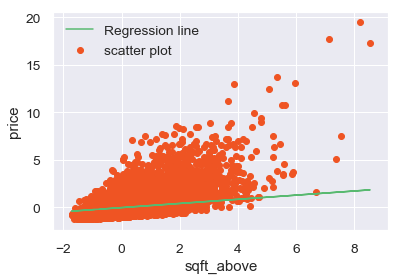

In [92]:
max_x = np.max(X)+100
min_x = np.min(X)-100

x = X
y = -0.011291532612494024 + 0.21836525 * x

plt.plot(x, y, color ='#58b970', label = 'Regression line')

plt.scatter(X, Y, c= '#ef5423', label='scatter plot')

plt.xlabel('sqft_above')
plt.ylabel('price')
plt.legend()
plt.show()


In [54]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, df['price'])

In [55]:
selector.support_ 

array([False, False, False, False,  True,  True,  True, False, False])

In [56]:
selector.ranking_

array([5, 2, 7, 6, 1, 1, 1, 3, 4])

In [57]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 0.58243278  0.30814148 -0.32910806]
0.002030357568080958


In [60]:
#validation
data = pd.concat([price, data_pred], axis=1)
y = data[['price']]
X =data.drop(['price'], axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16629 4158 16629 4158


In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [64]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [65]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.429786
dtype: float64
Test Mean Squarred Error: price    0.35611
dtype: float64


In [66]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.4297856898718587
Test Mean Squarred Error: 0.3561100591194179


In [ ]:
#cross validation

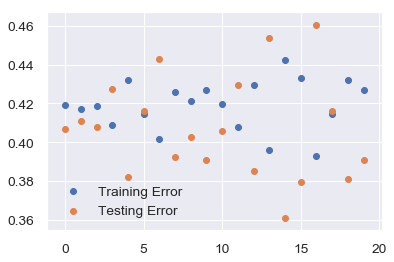

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [ ]:
# Running simple linear regression for each predictor on its own
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


# log_price = np.log(df['price'])
# df['log_price'] = log_price

target_var = 'price'
col_names = df.drop(['price'],axis=1).columns

# Create results list for saving the output statstics for each predictor
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]] 

for idx, val in enumerate(col_names): 
    
    # Use the names of the columns to determine format of forumla  
    if val.startswith('code'):
        
        df_run[val] = df_run[val].astype('category').cat.as_ordered() 
        f =f'{str(target_var)}~C({val})'
        
    elif val.startswith('bin'):
        
        df_run[val] = df_run[val].cat.as_ordered() 
        f =f'{str(target_var)}~C({val})'
        
    else:
        
        f =f'{str(target_var)}~{val}'
        
    # Run the ols models     
    model = smf.ols(formula=f, data=df).fit() 
    model.summary()
    
    # Append results
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ]) 
    
# Turn results into dataframe with correct index and columns
res_df = pd.DataFrame(results)
res_df.columns = res_df.iloc[0]
res_df=res_df[1:]
res_df.set_index('ind_var',inplace=True)
res_df.sort_values('r_squared',ascending=False)